In [1]:
# https://towardsdatascience.com/apply-function-to-pandas-dataframe-rows-76df74165ee4

In [2]:
# https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#skfuzzy.gaussmf

In [1]:
! pip install plotly_express
# Para usar as funções de visualização
# Não há necessidade de instalar novamente, uma vez feita a instalação. A importação é feita cada vez para uso.

In [2]:
import random
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import chi2
%matplotlib inline
import pandas_profiling

In [3]:
import plotly_express as px

In [4]:
qws = pd.read_csv("qwsA.csv")
# carregamento do dataset

In [5]:
qws = pd.DataFrame(qws)                  

In [6]:
qws.head(3)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...


In [7]:
qws.tail(2)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
362,6962.85,28,0.5,21,30.0,78,69,6915.08,5,32,4,SKOSThesaurusService,http://nbii-thesaurus.ornl.gov/ws/services/SKO...
363,1680.16,16,2.0,7,12.5,89,72,1667.22,11,30,4,sugarsoap,http://axonsolutions.com.au/sugarcrm/SugarSuit...


In [8]:
qws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 13 columns):
Response Time     364 non-null float64
Availability      364 non-null int64
Throughput        364 non-null float64
Succesability     364 non-null int64
Reliability       364 non-null float64
Compliance        364 non-null int64
Best Practices    364 non-null int64
Latency           364 non-null float64
Documentation     364 non-null int64
WsRF              364 non-null int64
Class             364 non-null int64
Service Name      364 non-null object
WSDL Address      364 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 37.1+ KB


In [9]:
round(qws.describe(),2)

,Response Time,Availability,Throughput,Succesability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class
count,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00
mean,840.28,84.75,7.28,64.44,61.32,83.68,80.69,763.48,47.53,66.65,2.78
std,2764.32,20.45,6.46,21.17,21.20,8.77,6.69,2755.56,36.40,11.51,0.98
min,45.00,14.00,0.10,7.00,5.90,67.00,58.00,31.50,1.00,30.00,1.00
25%,136.78,74.75,2.18,50.00,49.90,78.00,77.00,121.88,9.00,59.00,2.00
50%,236.65,96.00,5.60,67.00,64.20,78.00,83.00,180.93,39.00,67.50,3.00
75%,480.06,100.00,10.62,80.25,78.00,89.00,84.00,409.27,89.00,74.25,4.00
max,30781.00,100.00,29.50,99.00,97.70,100.00,95.00,30781.00,97.00,100.00,4.00


In [10]:
rt = np.array(qws["Response Time"]).reshape(-1,1)

In [11]:
av = np.array(qws["Availability"]).reshape(-1,1)

In [12]:
thr = np.array(qws["Throughput"]).reshape(-1,1)

In [13]:
sc = np.array(qws["Succesability"]).reshape(-1,1)

In [14]:
rb = np.array(qws["Reliability"]).reshape(-1,1)

In [15]:
cp = np.array(qws["Compliance"]).reshape(-1,1)

In [16]:
bp = np.array(qws["Best Practices"]).reshape(-1,1)

In [17]:
lt = np.array(qws["Latency"]).reshape(-1,1)

In [18]:
dc = np.array(qws["Documentation"]).reshape(-1,1)

In [19]:
ws = np.array(qws["WsRF"]).reshape(-1,1)

In [20]:
ws[0]

array([100], dtype=int64)

## Fuzzy Logic_triangular_3_regras

In [21]:
!pip install scikit-fuzzy

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96,1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trimf(Availability.universe,[0,0,35])
Availability['media'] = fuzz.trimf(Availability.universe,[25,50,75])
Availability['alta'] = fuzz.trimf(Availability.universe,[60,100,100])

# Reliability
Reliability['baixo'] = fuzz.trimf(Reliability.universe,[5.9,5.9,50])
Reliability['medio'] = fuzz.trimf(Reliability.universe,[20,50,75])
Reliability['alto'] = fuzz.trimf(Reliability.universe,[50,98.7,98.7])

Response_Time['baixo'] = fuzz.trimf(Response_Time.universe,[45,45,7500])
Response_Time['medio'] = fuzz.trimf(Response_Time.universe,[5000,15000,22500])
Response_Time['alto'] = fuzz.trimf(Response_Time.universe, [15000,30782,30782])

Throughput['baixo'] = fuzz.trimf(Throughput.universe,[0.1,0.1,7.5])
Throughput['medio'] = fuzz.trimf(Throughput.universe,[5,15,22.5])
Throughput['alto'] = fuzz.trimf(Throughput.universe,[15,30,30])

Sucessability['baixo'] = fuzz.trimf(Sucessability.universe,[7,7,25])
Sucessability['medio'] = fuzz.trimf(Sucessability.universe,[18,50,75])
Sucessability['alto'] = fuzz.trimf(Sucessability.universe,[50,100,100])

Compliance['baixo'] = fuzz.trimf(Compliance.universe,[67,67,74])
Compliance['medio'] = fuzz.trimf(Compliance.universe,[70,82,91])
Compliance['alto'] = fuzz.trimf(Compliance.universe,[82,100,100])

Best_Practice['baixo'] = fuzz.trimf(Best_Practice.universe,[58,58,67])
Best_Practice['medio'] = fuzz.trimf(Best_Practice.universe,[60,77,86])
Best_Practice['alto'] = fuzz.trimf(Best_Practice.universe,[77,96,96])

Lattency['baixo'] = fuzz.trimf(Lattency.universe,[31.5,31.5,7500])
Lattency['medio'] = fuzz.trimf(Lattency.universe,[5000,15000,32500])
Lattency['alto'] = fuzz.trimf(Lattency.universe,[15000,30782,30782])

Documentation['baixa'] = fuzz.trimf(Documentation.universe,[0,0,25])
Documentation['media'] = fuzz.trimf(Documentation.universe,[20,50,75])
Documentation['alta'] = fuzz.trimf(Documentation.universe,[60,98,98])

# WsRF
WsRF['ruim'] = fuzz.trimf(WsRF.universe,[30,30,70])
WsRF['medio'] = fuzz.trimf(WsRF.universe,[47,65,82])
WsRF['bom'] = fuzz.trimf(WsRF.universe,[50,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
#regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] & Sucessability['alto'] &
#Compliance['alto'] & Best_Practice['alto'] & Lattency['medio'] & Documentation['alta'], WsRF['medio'])

# regra 5 (adicional)
#regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['alto'] &
#Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['alta'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)


In [25]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)


0
[81.7133443]
[18.2866557]
[18.2866557]
[334.40177662]
1
[83.83333333]
[9.85663082]
[14.07164326]
[209.2147772]
2
[83.83333333]
[6.85185185]
[11.66504612]
[152.15244406]
3
[83.83333333]
[6.85185185]
[10.46174756]
[123.62127749]
4
[83.83333333]
[6.85185185]
[9.73976842]
[106.50257755]
5
[83.83333333]
[6.85185185]
[9.25844899]
[95.09011092]
6
[83.83333333]
[5.80524345]
[8.76513391]
[85.31930142]
7
[83.83333333]
[4.73484848]
[8.26134823]
[76.82452763]
8
[83.83333333]
[4.73484848]
[7.86951493]
[70.21748135]
9
[83.83333333]
[3.63984674]
[7.44654811]
[64.19851099]
10
[83.83333333]
[3.63984674]
[7.10048435]
[59.27389888]
11
[83.83333333]
[3.63984674]
[6.81209788]
[55.17005546]
12
[83.83333333]
[3.63984674]
[6.56807856]
[51.69757256]
13
[83.83333333]
[2.51937984]
[6.2788858]
[48.34020627]
14
[83.83333333]
[2.51937984]
[6.02825207]
[45.43048881]
15
[83.83333333]
[2.51937984]
[5.80894755]
[42.88448604]
16
[83.83333333]
[1.37254902]
[5.54798293]
[40.44193457]
17
[83.83333333]
[1.37254902]
[5.316

152
[64.62857143]
[7.67346939]
[-7.41351575]
[73.03728904]
153
[82.3226774]
[-17.60382485]
[-7.47968659]
[73.54904936]
154
[83.83333333]
[-19.76190476]
[-7.55892671]
[74.30912718]
155
[83.83333333]
[-19.76190476]
[-7.63715093]
[75.05946041]
156
[81.7133443]
[-16.733349]
[-7.6950885]
[75.45527553]
157
[83.83333333]
[-19.76190476]
[-7.77146075]
[76.18885677]
158
[83.83333333]
[-19.76190476]
[-7.84687235]
[76.91321057]
159
[82.3226774]
[-19.30822811]
[-7.91850582]
[77.54183883]
160
[83.15563735]
[-20.51541645]
[-7.9967475]
[78.30482163]
161
[83.83333333]
[-21.49758454]
[-8.080086]
[79.17965469]
162
[83.83333333]
[-21.49758454]
[-8.16240194]
[80.04375361]
163
[81.92443583]
[-18.73106641]
[-8.22684502]
[80.57422487]
164
[82.3226774]
[-19.30822811]
[-8.29400492]
[81.16161583]
165
[83.61346154]
[-21.17892977]
[-8.37162495]
[81.95915585]
166
[83.83333333]
[-21.49758454]
[-8.45022351]
[82.78591406]
167
[82.85308989]
[-20.07694187]
[-8.51943016]
[83.43545088]
168
[83.69231115]
[-21.29320457]
[-8

308
[83.75491256]
[-52.28165921]
[-17.06394069]
[199.42249711]
309
[83.83333333]
[-52.42424242]
[-17.17800618]
[201.46100877]
310
[75.77244508]
[-37.76808196]
[-17.24421221]
[202.20066622]
311
[64.66615385]
[-17.57482517]
[-17.24527186]
[201.85205681]
312
[80.79839049]
[-46.90616452]
[-17.3400351]
[203.3335421]
313
[50.8712441]
[7.5068289]
[-17.26090496]
[202.74027166]
314
[78.53485142]
[-45.43491004]
[-17.35034625]
[204.00763249]
315
[82.3226774]
[-52.44940258]
[-17.46141921]
[205.90056421]
316
[64.6511828]
[-19.72441258]
[-17.46855799]
[205.60891478]
317
[82.3226774]
[-52.44940258]
[-17.57856064]
[207.48490579]
318
[73.04020798]
[-37.81171318]
[-17.64198745]
[208.0934482]
319
[70.47152136]
[-32.96513465]
[-17.68987229]
[208.39707511]
320
[83.83333333]
[-58.17610063]
[-17.81599761]
[210.70952797]
321
[67.31129796]
[-27.00244899]
[-17.84452696]
[210.69121655]
322
[49.02338304]
[7.50305087]
[-17.76605149]
[210.08787991]
323
[45.88007055]
[13.43382916]
[-17.66975556]
[209.59592163]
324
[

IndexError: index 364 is out of bounds for axis 0 with size 364

## 3_Regras_5_feature_import_parâmetros_triangular

In [26]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trimf(Availability.universe,[0,0,35])
Availability['media'] = fuzz.trimf(Availability.universe,[25,50,75])
Availability['alta'] = fuzz.trimf(Availability.universe,[60,100,100])

# Reliability
Reliability['baixo'] = fuzz.trimf(Reliability.universe,[5.9,5.9,50])
Reliability['medio'] = fuzz.trimf(Reliability.universe,[20,50,75])
Reliability['alto'] = fuzz.trimf(Reliability.universe,[50,98.7,98.7])

Throughput['baixo'] = fuzz.trimf(Throughput.universe,[0.1,0.1,7.5])
Throughput['medio'] = fuzz.trimf(Throughput.universe,[5,15,22.5])
Throughput['alto'] = fuzz.trimf(Throughput.universe,[15,30,30])

Sucessability['baixo'] = fuzz.trimf(Sucessability.universe,[7,7,25])
Sucessability['medio'] = fuzz.trimf(Sucessability.universe,[18,50,75])
Sucessability['alto'] = fuzz.trimf(Sucessability.universe,[50,100,100])

Documentation['baixa'] = fuzz.trimf(Documentation.universe,[0,0,25])
Documentation['media'] = fuzz.trimf(Documentation.universe,[20,50,75])
Documentation['alta'] = fuzz.trimf(Documentation.universe,[60,98,98])

# WsRF
WsRF['ruim'] = fuzz.trimf(WsRF.universe,[30,30,70])
WsRF['medio'] = fuzz.trimf(WsRF.universe,[47,65,82])
WsRF['bom'] = fuzz.trimf(WsRF.universe,[50,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Throughput['baixo'] & Sucessability['baixo'] & 
 Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Throughput['medio'] & Sucessability['medio'] &
 Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Throughput['alto'] & Sucessability['alto'] &
 Documentation['alta'], WsRF['bom'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)


In [36]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[76.38658051]
[23.61341949]
[23.61341949]
[557.59358007]
1
[77.55244052]
[16.61027901]
[20.11184925]
[398.11033703]
2
[77.55244052]
[13.83062165]
[18.01810672]
[317.05413705]
3
[77.55244052]
[13.83062165]
[16.97123545]
[276.52603706]
4
[77.55244052]
[13.83062165]
[16.34311269]
[252.20917707]
5
[77.55244052]
[13.83062165]
[15.92436418]
[235.99793707]
6
[77.55244052]
[12.86242639]
[15.4869445]
[221.00489151]
7
[77.55244052]
[11.87222669]
[15.03510477]
[207.02321747]
8
[77.55244052]
[11.87222669]
[14.68367387]
[196.1485821]
9
[77.55244052]
[10.85926377]
[14.30123286]
[185.45936191]
10
[77.55244052]
[10.85926377]
[13.98832658]
[176.7136363]
11
[77.55244052]
[10.85926377]
[13.72757135]
[169.42553162]
12
[77.55244052]
[10.85926377]
[13.5069323]
[163.25867382]
13
[77.55244052]
[9.82274359]
[13.24377597]
[156.69457292]
14
[77.55244052]
[9.82274359]
[13.01570714]
[151.00568547]
15
[77.55244052]
[9.82274359]
[12.81614692]
[146.02790896]
16
[77.55244052]
[8.76183469]
[12.57765796]
[140.70074621

185
[77.55244052]
[-15.74991122]
[-1.35654247]
[58.6824382]
186
[77.55244052]
[-15.74991122]
[-1.43351235]
[58.96410431]
187
[77.55244052]
[-15.74991122]
[-1.50966341]
[59.24277397]
188
[76.70451623]
[-14.48435259]
[-1.57831256]
[59.42761451]
189
[66.94675433]
[0.07947115]
[-1.56958738]
[59.11485251]
190
[76.38658051]
[-14.00982165]
[-1.6347195]
[59.26664854]
191
[53.44919592]
[20.22508072]
[-1.52086637]
[59.9143446]
192
[77.55244052]
[-15.74991122]
[-1.59459199]
[60.18087131]
193
[77.55244052]
[-15.74991122]
[-1.66755756]
[60.44465033]
194
[77.31021016]
[-15.38837337]
[-1.73792071]
[60.67980819]
195
[77.54965535]
[-15.74575425]
[-1.80938925]
[60.93805013]
196
[77.55244052]
[-15.74991122]
[-1.88015332]
[61.19396866]
197
[76.38658051]
[-14.00982165]
[-1.94141427]
[61.32989758]
198
[76.38658051]
[-14.00982165]
[-2.00205954]
[61.46446037]
199
[53.20857049]
[19.3809538]
[-1.89514447]
[61.97524141]
200
[53.58238645]
[18.81456598]
[-1.79211109]
[62.43405676]
201
[77.55244052]
[-17.50369775]


323
[45.88007055]
[13.43382916]
[-7.90085505]
[115.54449367]
324
[70.71492946]
[-33.42439521]
[-7.97938902]
[116.15456823]
325
[76.90185195]
[-45.09783386]
[-8.09324928]
[117.55071534]
326
[76.38658051]
[-46.89727021]
[-8.21191601]
[119.0099037]
327
[77.08205974]
[-48.23473027]
[-8.33393679]
[120.56508607]
328
[56.24242413]
[-8.15850794]
[-8.33340357]
[120.2533325]
329
[52.86210816]
[-1.65790031]
[-8.31317477]
[119.89118068]
330
[75.73865799]
[-45.65126536]
[-8.42597867]
[121.23146075]
331
[53.58238645]
[-3.04305087]
[-8.40976503]
[120.87384775]
332
[70.71492946]
[-35.99024897]
[-8.49258931]
[121.56266078]
333
[76.70451623]
[-50.40101222]
[-8.61806363]
[123.17691076]
334
[70.71492946]
[-38.65672444]
[-8.70773127]
[123.96945265]
335
[68.88818609]
[-35.07487468]
[-8.78620491]
[124.55283881]
336
[75.63192921]
[-48.29790042]
[-8.9034503]
[125.98363732]
337
[53.10322279]
[-4.12396625]
[-8.88930981]
[125.62399208]
338
[54.99388311]
[-9.98776621]
[-8.8925501]
[125.32698581]
339
[53.20857049]


IndexError: index 364 is out of bounds for axis 0 with size 364

## Fuzzy_Logic_triangular_5_regras

In [34]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96,1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trimf(Availability.universe,[0,0,35])
Availability['media'] = fuzz.trimf(Availability.universe,[25,50,75])
Availability['alta'] = fuzz.trimf(Availability.universe,[60,100,100])

# Reliability
Reliability['baixo'] = fuzz.trimf(Reliability.universe,[5.9,5.9,50])
Reliability['medio'] = fuzz.trimf(Reliability.universe,[20,50,75])
Reliability['alto'] = fuzz.trimf(Reliability.universe,[50,98.7,98.7])

Response_Time['baixo'] = fuzz.trimf(Response_Time.universe,[45,45,7500])
Response_Time['medio'] = fuzz.trimf(Response_Time.universe,[5000,15000,22500])
Response_Time['alto'] = fuzz.trimf(Response_Time.universe, [15000,30782,30782])

Throughput['baixo'] = fuzz.trimf(Throughput.universe,[0.1,0.1,7.5])
Throughput['medio'] = fuzz.trimf(Throughput.universe,[5,15,22.5])
Throughput['alto'] = fuzz.trimf(Throughput.universe,[15,30,30])

Sucessability['baixo'] = fuzz.trimf(Sucessability.universe,[7,7,25])
Sucessability['medio'] = fuzz.trimf(Sucessability.universe,[18,50,75])
Sucessability['alto'] = fuzz.trimf(Sucessability.universe,[50,100,100])

Compliance['baixo'] = fuzz.trimf(Compliance.universe,[67,67,74])
Compliance['medio'] = fuzz.trimf(Compliance.universe,[70,82,91])
Compliance['alto'] = fuzz.trimf(Compliance.universe,[82,100,100])

Best_Practice['baixo'] = fuzz.trimf(Best_Practice.universe,[58,58,67])
Best_Practice['medio'] = fuzz.trimf(Best_Practice.universe,[60,77,86])
Best_Practice['alto'] = fuzz.trimf(Best_Practice.universe,[77,96,96])

Lattency['baixo'] = fuzz.trimf(Lattency.universe,[31.5,31.5,7500])
Lattency['medio'] = fuzz.trimf(Lattency.universe,[5000,15000,32500])
Lattency['alto'] = fuzz.trimf(Lattency.universe,[15000,30782,30782])

Documentation['baixa'] = fuzz.trimf(Documentation.universe,[0,0,25])
Documentation['media'] = fuzz.trimf(Documentation.universe,[20,50,75])
Documentation['alta'] = fuzz.trimf(Documentation.universe,[60,98,98])

# WsRF
WsRF['ruim'] = fuzz.trimf(WsRF.universe,[30,30,70])
WsRF['medio'] = fuzz.trimf(WsRF.universe,[47,65,82])
WsRF['bom'] = fuzz.trimf(WsRF.universe,[50,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] & Sucessability['alto'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['medio'] & Documentation['alta'], WsRF['medio'])

# regra 5 (adicional)
regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['alto'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['alta'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4, regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [37]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[76.38658051]
[23.61341949]
[23.61341949]
[557.59358007]
1
[77.55244052]
[16.61027901]
[20.11184925]
[398.11033703]
2
[77.55244052]
[13.83062165]
[18.01810672]
[317.05413705]
3
[77.55244052]
[13.83062165]
[16.97123545]
[276.52603706]
4
[77.55244052]
[13.83062165]
[16.34311269]
[252.20917707]
5
[77.55244052]
[13.83062165]
[15.92436418]
[235.99793707]
6
[77.55244052]
[12.86242639]
[15.4869445]
[221.00489151]
7
[77.55244052]
[11.87222669]
[15.03510477]
[207.02321747]
8
[77.55244052]
[11.87222669]
[14.68367387]
[196.1485821]
9
[77.55244052]
[10.85926377]
[14.30123286]
[185.45936191]
10
[77.55244052]
[10.85926377]
[13.98832658]
[176.7136363]
11
[77.55244052]
[10.85926377]
[13.72757135]
[169.42553162]
12
[77.55244052]
[10.85926377]
[13.5069323]
[163.25867382]
13
[77.55244052]
[9.82274359]
[13.24377597]
[156.69457292]
14
[77.55244052]
[9.82274359]
[13.01570714]
[151.00568547]
15
[77.55244052]
[9.82274359]
[12.81614692]
[146.02790896]
16
[77.55244052]
[8.76183469]
[12.57765796]
[140.70074621

[-15.74991122]
[-1.50966341]
[59.24277397]
188
[76.70451623]
[-14.48435259]
[-1.57831256]
[59.42761451]
189
[66.94675433]
[0.07947115]
[-1.56958738]
[59.11485251]
190
[76.38658051]
[-14.00982165]
[-1.6347195]
[59.26664854]
191
[53.44919592]
[20.22508072]
[-1.52086637]
[59.9143446]
192
[77.55244052]
[-15.74991122]
[-1.59459199]
[60.18087131]
193
[77.55244052]
[-15.74991122]
[-1.66755756]
[60.44465033]
194
[77.31021016]
[-15.38837337]
[-1.73792071]
[60.67980819]
195
[77.54965535]
[-15.74575425]
[-1.80938925]
[60.93805013]
196
[77.55244052]
[-15.74991122]
[-1.88015332]
[61.19396866]
197
[76.38658051]
[-14.00982165]
[-1.94141427]
[61.32989758]
198
[76.38658051]
[-14.00982165]
[-2.00205954]
[61.46446037]
199
[53.20857049]
[19.3809538]
[-1.89514447]
[61.97524141]
200
[53.58238645]
[18.81456598]
[-1.79211109]
[62.43405676]
201
[77.55244052]
[-17.50369775]
[-1.86989122]
[62.78566481]
202
[77.55244052]
[-17.50369775]
[-1.94690504]
[63.13380873]
203
[77.55244052]
[-17.50369775]
[-2.02316383]
[63

327
[77.08205974]
[-48.23473027]
[-8.33393679]
[120.56508607]
328
[56.24242413]
[-8.15850794]
[-8.33340357]
[120.2533325]
329
[52.86210816]
[-1.65790031]
[-8.31317477]
[119.89118068]
330
[75.73865799]
[-45.65126536]
[-8.42597867]
[121.23146075]
331
[53.58238645]
[-3.04305087]
[-8.40976503]
[120.87384775]
332
[70.71492946]
[-35.99024897]
[-8.49258931]
[121.56266078]
333
[76.70451623]
[-50.40101222]
[-8.61806363]
[123.17691076]
334
[70.71492946]
[-38.65672444]
[-8.70773127]
[123.96945265]
335
[68.88818609]
[-35.07487468]
[-8.78620491]
[124.55283881]
336
[75.63192921]
[-48.29790042]
[-8.9034503]
[125.98363732]
337
[53.10322279]
[-4.12396625]
[-8.88930981]
[125.62399208]
338
[54.99388311]
[-9.98776621]
[-8.8925501]
[125.32698581]
339
[53.20857049]
[-6.41714099]
[-8.88526948]
[124.98865622]
340
[74.03099847]
[-51.08367034]
[-9.00901846]
[126.45951319]
341
[77.4270083]
[-58.01430266]
[-9.15230876]
[128.45259883]
342
[52.86210816]
[-7.88185339]
[-9.14860481]
[128.12158799]
343
[58.46396815]
[

IndexError: index 364 is out of bounds for axis 0 with size 364

## 5Regras_5par_especialist_triang

In [40]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trimf(Availability.universe,[0,0,35])
Availability['media'] = fuzz.trimf(Availability.universe,[25,50,75])
Availability['alta'] = fuzz.trimf(Availability.universe,[60,100,100])

# Reliability
Reliability['baixo'] = fuzz.trimf(Reliability.universe,[5.9,5.9,50])
Reliability['medio'] = fuzz.trimf(Reliability.universe,[20,50,75])
Reliability['alto'] = fuzz.trimf(Reliability.universe,[50,98.7,98.7])

Response_Time['baixo'] = fuzz.trimf(Response_Time.universe,[45,45,7500])
Response_Time['medio'] = fuzz.trimf(Response_Time.universe,[5000,15000,22500])
Response_Time['alto'] = fuzz.trimf(Response_Time.universe, [15000,30782,30782])

Throughput['baixo'] = fuzz.trimf(Throughput.universe,[0.1,0.1,7.5])
Throughput['medio'] = fuzz.trimf(Throughput.universe,[5,15,22.5])
Throughput['alto'] = fuzz.trimf(Throughput.universe,[15,30,30])

Lattency['baixo'] = fuzz.trimf(Lattency.universe,[31.5,31.5,7500])
Lattency['medio'] = fuzz.trimf(Lattency.universe,[5000,15000,32500])
Lattency['alto'] = fuzz.trimf(Lattency.universe,[15000,30782,30782])

# WsRF
WsRF['ruim'] = fuzz.trimf(WsRF.universe,[30,30,70])
WsRF['medio'] = fuzz.trimf(WsRF.universe,[47,65,82])
WsRF['bom'] = fuzz.trimf(WsRF.universe,[50,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & 
Lattency['alto'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & 
Lattency['medio'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & 
Lattency['baixo'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] &
Lattency['medio'], WsRF['medio'])

# regra 5 (adicional)
regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] & 
Lattency['alto'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4, regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [42]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['lattency'] = lt[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[78.29512855]
[21.70487145]
[21.70487145]
[471.10144483]
1
[77.55244052]
[16.61027901]
[19.15757523]
[354.86426941]
2
[77.55244052]
[13.83062165]
[17.38192404]
[288.2234253]
3
[77.55244052]
[13.83062165]
[16.49409844]
[254.90300325]
4
[77.55244052]
[13.83062165]
[15.96140308]
[234.91075002]
5
[77.55244052]
[13.83062165]
[15.60627284]
[221.5825812]
6
[77.55244052]
[12.86242639]
[15.21429478]
[208.64887219]
7
[77.55244052]
[11.87222669]
[14.79653627]
[196.21170056]
8
[77.55244052]
[11.87222669]
[14.47161298]
[186.53834485]
9
[77.55244052]
[10.85926377]
[14.11037806]
[176.81014838]
10
[77.55244052]
[10.85926377]
[13.81482222]
[168.85071491]
11
[77.55244052]
[10.85926377]
[13.56852568]
[162.21785368]
12
[77.55244052]
[10.85926377]
[13.36012092]
[156.60543265]
13
[77.55244052]
[9.82274359]
[13.10745111]
[150.51656326]
14
[77.55244052]
[9.82274359]
[12.88847061]
[145.23954312]
15
[77.55244052]
[9.82274359]
[12.69686267]
[140.62215051]
16
[77.55244052]
[8.76183469]
[12.46539043]
[135.612973

[55.39742749]
171
[77.55244052]
[-14.04770664]
[-0.37610445]
[55.60586756]
172
[76.38658051]
[-12.33320663]
[-0.44522065]
[55.69100551]
173
[77.55244052]
[-14.04770664]
[-0.52339586]
[55.89536249]
174
[77.55244052]
[-14.04770664]
[-0.60067763]
[56.09738396]
175
[77.55244052]
[-14.04770664]
[-0.67708121]
[56.29710973]
176
[74.03099847]
[-8.86911539]
[-0.72336389]
[56.18454382]
177
[75.95098835]
[-11.69262992]
[-0.78498898]
[56.22405883]
178
[77.47275441]
[-13.9305212]
[-0.8584277]
[56.41126004]
179
[77.55244052]
[-14.04770664]
[-0.93170147]
[56.60480371]
180
[77.55244052]
[-14.04770664]
[-1.00416559]
[56.79620877]
181
[77.55244052]
[-14.04770664]
[-1.0758334]
[56.98551048]
182
[77.50903017]
[-15.68511966]
[-1.15566556]
[57.27760996]
183
[77.55244052]
[-15.74991122]
[-1.23498212]
[57.57150338]
184
[77.55244052]
[-15.74991122]
[-1.31344119]
[57.86221959]
185
[77.55244052]
[-15.74991122]
[-1.39105662]
[58.14980981]
186
[77.55244052]
[-15.74991122]
[-1.46784194]
[58.4343242]
187
[77.5524405

341
[77.4270083]
[-58.01430266]
[-9.18679281]
[128.01970788]
342
[52.86210816]
[-7.88185339]
[-9.18298833]
[127.68995911]
343
[58.46396815]
[-21.79993365]
[-9.21966549]
[127.63706571]
344
[53.44919592]
[-11.35249149]
[-9.2258476]
[127.353172]
345
[52.84370215]
[-12.43340882]
[-9.235118]
[127.08379537]
346
[53.10322279]
[-12.9855804]
[-9.24592625]
[126.82490641]
347
[54.99388311]
[-22.20862913]
[-9.2831754]
[126.74747191]
348
[61.25784381]
[-36.12854181]
[-9.36009622]
[127.14165533]
349
[52.92853761]
[-20.29213092]
[-9.39133061]
[127.00616141]
350
[53.10322279]
[-20.6891427]
[-9.4235181]
[126.88041356]
351
[53.10322279]
[-20.6891427]
[-9.45552272]
[126.75538018]
352
[52.92853761]
[-23.08962234]
[-9.49414623]
[126.67555151]
353
[46.1038961]
[-9.7711812]
[-9.49492882]
[126.36528714]
354
[46.33333333]
[-13.00813008]
[-9.50482516]
[126.08945378]
355
[53.00942484]
[-32.52356209]
[-9.56948453]
[126.2106776]
356
[49.02338304]
[-25.70098215]
[-9.6146708]
[126.13856984]
357
[47.05246166]
[-20.64

IndexError: index 364 is out of bounds for axis 0 with size 364

## Fuzzy Logic_trapezoidal_3 regras

In [28]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96,1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trapmf(Availability.universe,[0,0,20,35])
Availability['media'] = fuzz.trapmf(Availability.universe,[25,40,60,75])
Availability['alta'] = fuzz.trapmf(Availability.universe,[60,80,100,100])

# Reliability
Reliability['baixo'] = fuzz.trapmf(Reliability.universe,[5.9,5.9,25,30])
Reliability['medio'] = fuzz.trapmf(Reliability.universe,[20,40,60,75])
Reliability['alto'] = fuzz.trapmf(Reliability.universe,[50,75,98.7,98.7])

Response_Time['baixo'] = fuzz.trapmf(Response_Time.universe,[45,45,4000,7500])
Response_Time['medio'] = fuzz.trapmf(Response_Time.universe,[5000,12000,17000,22500])
Response_Time['alto'] = fuzz.trapmf(Response_Time.universe, [15000,25000,30782,30782])

Throughput['baixo'] = fuzz.trapmf(Throughput.universe,[0.1,0.1,4,7.5])
Throughput['medio'] = fuzz.trapmf(Throughput.universe,[5,10,16,22.5])
Throughput['alto'] = fuzz.trapmf(Throughput.universe,[15,23,30,30])

Sucessability['baixo'] = fuzz.trapmf(Sucessability.universe,[7,7,15,25])
Sucessability['medio'] = fuzz.trapmf(Sucessability.universe,[18,40,60,75])
Sucessability['alto'] = fuzz.trapmf(Sucessability.universe,[50,75,100,100])

Compliance['baixo'] = fuzz.trapmf(Compliance.universe,[67,67,70,74])
Compliance['medio'] = fuzz.trapmf(Compliance.universe,[70,77,85,91])
Compliance['alto'] = fuzz.trapmf(Compliance.universe,[82,90,100,100])

Best_Practice['baixo'] = fuzz.trapmf(Best_Practice.universe,[58,58,62,67])
Best_Practice['medio'] = fuzz.trapmf(Best_Practice.universe,[60,70,80,86])
Best_Practice['alto'] = fuzz.trapmf(Best_Practice.universe,[77,85,96,96])

Lattency['baixo'] = fuzz.trapmf(Lattency.universe,[31.5,31.5,5000,7500])
Lattency['medio'] = fuzz.trapmf(Lattency.universe,[5000,10000,15000,20000])
Lattency['alto'] = fuzz.trapmf(Lattency.universe,[15000,22500,30782,30782])

Documentation['baixa'] = fuzz.trapmf(Documentation.universe,[0,0,17,25])
Documentation['media'] = fuzz.trapmf(Documentation.universe,[20,40,60,75])
Documentation['alta'] = fuzz.trapmf(Documentation.universe,[60,80,98,98])

# WsRF
WsRF['ruim'] = fuzz.trapmf(WsRF.universe,[30,30,40,55])
WsRF['medio'] = fuzz.trapmf(WsRF.universe,[47,55,75,82])
WsRF['bom'] = fuzz.trapmf(WsRF.universe,[75,85,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
#regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] & Sucessability['alto'] &
#Compliance['alto'] & Best_Practice['alto'] & Lattency['medio'] & Documentation['alta'], WsRF['medio'])

# regra 5 (adicional)
#regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['alto'] &
#Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['alta'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

90.174
-0.098


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



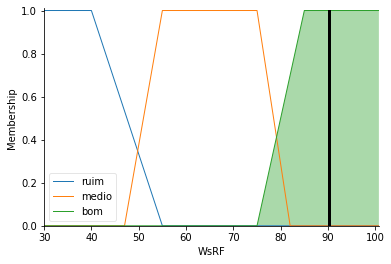

In [29]:
engine.input['availability'] = 83
engine.input['reliability'] = 97.4
engine.input['response_time'] = 45
engine.input['throughput'] = 83
engine.input['sucessability'] = 50
engine.input['compliance'] = 89
engine.input['best_practice'] = 91
engine.input['lattency'] = 43
engine.input['documentation'] = 58

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 100
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

In [30]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[90.17419679]
[9.82580321]
[9.82580321]
[96.54640878]
1
[90.17419679]
[3.03849808]
[6.43215065]
[52.26578629]
2
[90.17419679]
[-0.19355199]
[4.2235831]
[34.85397237]
3
[90.17419679]
[-0.19355199]
[3.11929933]
[26.1480654]
4
[90.17419679]
[-0.19355199]
[2.45672907]
[20.92452123]
5
[90.17419679]
[-0.19355199]
[2.01501556]
[17.44215844]
6
[90.17419679]
[-1.31932223]
[1.53868159]
[15.14738411]
7
[90.17419679]
[-2.47067817]
[1.03751162]
[13.84485255]
8
[90.17419679]
[-2.47067817]
[0.64771275]
[12.83177245]
9
[90.17419679]
[-3.64850205]
[0.21809127]
[12.55614773]
10
[90.17419679]
[-3.64850205]
[-0.13341721]
[12.3306366]
11
[90.17419679]
[-3.64850205]
[-0.42634095]
[12.14271065]
12
[90.17419679]
[-3.64850205]
[-0.6741995]
[11.98369639]
13
[90.17419679]
[-4.85371719]
[-0.97273647]
[12.37228371]
14
[90.17419679]
[-4.85371719]
[-1.23146852]
[12.70905938]
15
[90.17419679]
[-4.85371719]
[-1.45785906]
[13.00373809]
16
[90.17419679]
[-6.08729034]
[-1.73017855]
[13.81365423]
17
[90.17419679]
[-6.08

162
[90.17419679]
[-30.68724172]
[-16.48491289]
[206.87771104]
163
[90.17419679]
[-30.68724172]
[-16.57151245]
[208.35008237]
164
[90.17419679]
[-30.68724172]
[-16.65706233]
[209.80460678]
165
[90.17419679]
[-30.68724172]
[-16.74158148]
[211.2416068]
166
[90.17419679]
[-30.68724172]
[-16.82508843]
[212.66139723]
167
[90.17419679]
[-30.68724172]
[-16.90760125]
[214.0642854]
168
[90.17419679]
[-30.68724172]
[-16.98913758]
[215.45057134]
169
[90.17419679]
[-32.60911292]
[-17.08101979]
[217.07553859]
170
[77.16821664]
[-13.48267153]
[-17.05997681]
[216.2976477]
171
[90.17419679]
[-32.60911292]
[-17.15037877]
[217.89879511]
172
[90.17419679]
[-32.60911292]
[-17.23973561]
[219.48143215]
173
[90.17419679]
[-32.60911292]
[-17.32806537]
[221.04587796]
174
[90.17419679]
[-32.60911292]
[-17.41538564]
[222.59244439]
175
[90.17419679]
[-32.60911292]
[-17.50171364]
[224.12143621]
176
[86.5047923]
[-27.21292985]
[-17.55657926]
[224.78983113]
177
[90.07093254]
[-32.45725373]
[-17.64029092]
[226.263630

319
[71.06284346]
[-34.08083672]
[-26.13477777]
[399.89763341]
320
[90.17419679]
[-70.13999394]
[-26.27186567]
[402.95689595]
321
[67.61468364]
[-27.57487479]
[-26.27591229]
[402.36879682]
322
[43.98348637]
[17.01228987]
[-26.14189308]
[401.3747681]
323
[39.28571429]
[25.87601078]
[-25.981344]
[400.71645595]
324
[81.29583981]
[-53.38837701]
[-26.06567333]
[401.9470347]
325
[90.17419679]
[-70.13999394]
[-26.20087063]
[404.95308953]
326
[90.17419679]
[-73.4119169]
[-26.34524692]
[408.17118191]
327
[90.17419679]
[-73.4119169]
[-26.48874287]
[411.36965179]
328
[67.61468364]
[-30.02823777]
[-26.49950121]
[410.8603773]
329
[64.72727273]
[-24.47552448]
[-26.49336795]
[410.10620486]
330
[89.85998062]
[-72.80765504]
[-26.63329026]
[413.19766083]
331
[64.72727273]
[-24.47552448]
[-26.62679097]
[412.44099158]
332
[81.29583981]
[-56.33815349]
[-26.71601428]
[413.77974606]
333
[90.17419679]
[-76.81215056]
[-26.86600271]
[417.13554829]
334
[81.29583981]
[-59.40360748]
[-26.96312989]
[418.63018221]
3

IndexError: index 364 is out of bounds for axis 0 with size 364

## 3_Regras_normais_5_parâmetros_trapezoidal

In [31]:
Availability['baixa'] = fuzz.trapmf(Availability.universe,[0,0,20,35])
Availability['media'] = fuzz.trapmf(Availability.universe,[25,40,60,75])
Availability['alta'] = fuzz.trapmf(Availability.universe,[60,80,100,100])

# Reliability
Reliability['baixo'] = fuzz.trapmf(Reliability.universe,[5.9,5.9,25,30])
Reliability['medio'] = fuzz.trapmf(Reliability.universe,[20,40,60,75])
Reliability['alto'] = fuzz.trapmf(Reliability.universe,[50,75,98.7,98.7])

Throughput['baixo'] = fuzz.trapmf(Throughput.universe,[0.1,0.1,4,7.5])
Throughput['medio'] = fuzz.trapmf(Throughput.universe,[5,10,16,22.5])
Throughput['alto'] = fuzz.trapmf(Throughput.universe,[15,23,30,30])

Sucessability['baixo'] = fuzz.trapmf(Sucessability.universe,[7,7,15,25])
Sucessability['medio'] = fuzz.trapmf(Sucessability.universe,[18,40,60,75])
Sucessability['alto'] = fuzz.trapmf(Sucessability.universe,[50,75,100,100])

Documentation['baixa'] = fuzz.trapmf(Documentation.universe,[0,0,17,25])
Documentation['media'] = fuzz.trapmf(Documentation.universe,[20,40,60,75])
Documentation['alta'] = fuzz.trapmf(Documentation.universe,[60,80,98,98])

# WsRF
WsRF['ruim'] = fuzz.trapmf(WsRF.universe,[30,30,40,55])
WsRF['medio'] = fuzz.trapmf(WsRF.universe,[47,55,75,82])
WsRF['bom'] = fuzz.trapmf(WsRF.universe,[75,85,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa'] | Reliability['baixo'] & Throughput['baixo'] & Sucessability['baixo'] & 
 Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Throughput['medio'] & Sucessability['medio'] &
 Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Throughput['alto'] & Sucessability['alto'] &
 Documentation['alta'], WsRF['bom'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)


In [33]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[90.17419679]
[9.82580321]
[9.82580321]
[152689.93122886]
1
[90.17419679]
[3.03849808]
[6.43215065]
[76348.95819633]
2
[90.17419679]
[-0.19355199]
[4.2235831]
[50899.31557906]
3
[90.17419679]
[-0.19355199]
[3.11929933]
[38174.49427042]
4
[90.17419679]
[-0.19355199]
[2.45672907]
[30539.60148524]
5
[90.17419679]
[-0.19355199]
[2.01501556]
[25449.67296179]
6
[90.17419679]
[-1.31932223]
[1.53868159]
[21814.2023584]
7
[90.17419679]
[-2.47067817]
[1.03751162]
[19088.01795506]
8
[90.17419679]
[-2.47067817]
[0.64771275]
[16967.65230802]
9
[90.17419679]
[-3.64850205]
[0.21809127]
[15271.89462974]
10
[90.17419679]
[-3.64850205]
[-0.13341721]
[13884.45652933]
11
[90.17419679]
[-3.64850205]
[-0.42634095]
[12728.25811233]
12
[90.17419679]
[-3.64850205]
[-0.6741995]
[11749.93637486]
13
[90.17419679]
[-4.85371719]
[-0.97273647]
[10911.89977085]
14
[90.17419679]
[-4.85371719]
[-1.23146852]
[10185.60138072]
15
[90.17419679]
[-4.85371719]
[-1.45785906]
[9550.09028935]
16
[90.17419679]
[-6.08729034]
[-

137
[82.72085898]
[-16.50825208]
[-14.31052987]
[1275.21997279]
138
[90.17419679]
[-27.00591097]
[-14.40186354]
[1268.69069113]
139
[90.17419679]
[-27.00591097]
[-14.49189245]
[1262.25468492]
140
[90.17419679]
[-27.00591097]
[-14.58064436]
[1255.90996959]
141
[90.17419679]
[-28.82028112]
[-14.68092349]
[1249.9317178]
142
[90.17419679]
[-28.82028112]
[-14.77980012]
[1244.03707793]
143
[90.17419679]
[-28.82028112]
[-14.87730346]
[1238.22430805]
144
[90.17419679]
[-28.82028112]
[-14.97346192]
[1232.49171432]
145
[78.85116041]
[-12.64451488]
[-14.95751023]
[1224.58658641]
146
[90.17419679]
[-28.82028112]
[-15.0518148]
[1219.02476077]
147
[90.17419679]
[-28.82028112]
[-15.14484497]
[1213.53809492]
148
[90.17419679]
[-28.82028112]
[-15.23662642]
[1208.1250756]
149
[90.17419679]
[-28.82028112]
[-15.32718412]
[1202.78422987]
150
[90.17419679]
[-28.82028112]
[-15.41654238]
[1197.51412382]
151
[90.17419679]
[-28.82028112]
[-15.50472487]
[1192.31336127]
152
[64.72727273]
[7.53246753]
[-15.3541549

284
[81.29583981]
[-40.16524106]
[-23.51918487]
[878.78009766]
285
[90.17419679]
[-55.47275308]
[-23.63091064]
[879.32694675]
286
[90.17419679]
[-55.47275308]
[-23.74185782]
[879.86998505]
287
[90.17419679]
[-58.20034524]
[-23.86150535]
[880.6361564]
288
[64.72727273]
[-13.55661882]
[-23.8258483]
[877.79558404]
289
[71.06284346]
[-24.6716552]
[-23.82876488]
[875.45064604]
290
[90.17419679]
[-58.20034524]
[-23.94688027]
[876.22410545]
291
[89.96617647]
[-57.83539732]
[-24.06293684]
[876.94514889]
292
[40.20833333]
[29.45906433]
[-23.88026789]
[874.91448309]
293
[90.17419679]
[-61.02535141]
[-24.00661171]
[875.9109499]
294
[90.17419679]
[-61.02535141]
[-24.13209897]
[876.90066101]
295
[69.83300804]
[-24.70180007]
[-24.13402363]
[874.58461861]
296
[90.17419679]
[-61.02535141]
[-24.25823686]
[875.57213076]
297
[73.83634052]
[-31.85060808]
[-24.28371461]
[873.70153651]
298
[90.17419679]
[-61.02535141]
[-24.40659634]
[874.68539667]
299
[90.17419679]
[-61.02535141]
[-24.52865886]
[875.6626977

IndexError: index 364 is out of bounds for axis 0 with size 364

## Trapezoidal_5_Regras

In [38]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96,1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trapmf(Availability.universe,[0,0,20,35])
Availability['media'] = fuzz.trapmf(Availability.universe,[25,40,60,75])
Availability['alta'] = fuzz.trapmf(Availability.universe,[60,80,100,100])

# Reliability
Reliability['baixo'] = fuzz.trapmf(Reliability.universe,[5.9,5.9,25,30])
Reliability['medio'] = fuzz.trapmf(Reliability.universe,[20,40,60,75])
Reliability['alto'] = fuzz.trapmf(Reliability.universe,[50,75,98.7,98.7])

Response_Time['baixo'] = fuzz.trapmf(Response_Time.universe,[45,45,4000,7500])
Response_Time['medio'] = fuzz.trapmf(Response_Time.universe,[5000,12000,17000,22500])
Response_Time['alto'] = fuzz.trapmf(Response_Time.universe, [15000,25000,30782,30782])

Throughput['baixo'] = fuzz.trapmf(Throughput.universe,[0.1,0.1,4,7.5])
Throughput['medio'] = fuzz.trapmf(Throughput.universe,[5,10,16,22.5])
Throughput['alto'] = fuzz.trapmf(Throughput.universe,[15,23,30,30])

Sucessability['baixo'] = fuzz.trapmf(Sucessability.universe,[7,7,15,25])
Sucessability['medio'] = fuzz.trapmf(Sucessability.universe,[18,40,60,75])
Sucessability['alto'] = fuzz.trapmf(Sucessability.universe,[50,75,100,100])

Compliance['baixo'] = fuzz.trapmf(Compliance.universe,[67,67,70,74])
Compliance['medio'] = fuzz.trapmf(Compliance.universe,[70,77,85,91])
Compliance['alto'] = fuzz.trapmf(Compliance.universe,[82,90,100,100])

Best_Practice['baixo'] = fuzz.trapmf(Best_Practice.universe,[58,58,62,67])
Best_Practice['medio'] = fuzz.trapmf(Best_Practice.universe,[60,70,80,86])
Best_Practice['alto'] = fuzz.trapmf(Best_Practice.universe,[77,85,96,96])

Lattency['baixo'] = fuzz.trapmf(Lattency.universe,[31.5,31.5,5000,7500])
Lattency['medio'] = fuzz.trapmf(Lattency.universe,[5000,10000,15000,20000])
Lattency['alto'] = fuzz.trapmf(Lattency.universe,[15000,22500,30782,30782])

Documentation['baixa'] = fuzz.trapmf(Documentation.universe,[0,0,17,25])
Documentation['media'] = fuzz.trapmf(Documentation.universe,[20,40,60,75])
Documentation['alta'] = fuzz.trapmf(Documentation.universe,[60,80,98,98])

# WsRF
WsRF['ruim'] = fuzz.trapmf(WsRF.universe,[30,30,40,55])
WsRF['medio'] = fuzz.trapmf(WsRF.universe,[47,55,75,82])
WsRF['bom'] = fuzz.trapmf(WsRF.universe,[75,85,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] & Sucessability['alto'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['medio'] & Documentation['alta'], WsRF['medio'])

# regra 5 (adicional)
regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] & Sucessability['alto'] &
        Compliance['medio'] & Best_Practice['medio'] & Lattency['alto'] & Documentation['alta'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [39]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['sucessability'] = sc[i]
    engine.input['compliance'] = cp[i]
    engine.input['best_practice'] = bp[i]
    engine.input['lattency'] = lt[i]
    engine.input['documentation'] = dc[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[75.57746497]
[24.42253503]
[24.42253503]
[596.4602174]
1
[75.57746497]
[18.73390864]
[21.57822183]
[450.00247217]
2
[75.57746497]
[16.02503892]
[19.72716086]
[369.3381537]
3
[75.57746497]
[16.02503892]
[18.80163038]
[329.00599446]
4
[75.57746497]
[16.02503892]
[18.24631209]
[304.80669892]
5
[75.57746497]
[16.02503892]
[17.87609989]
[288.67383523]
6
[75.57746497]
[15.08150004]
[17.47687134]
[273.17249401]
7
[75.57746497]
[14.11651708]
[17.05682706]
[258.31585433]
8
[75.57746497]
[14.11651708]
[16.73012595]
[246.76069014]
9
[75.57746497]
[13.12935061]
[16.37004842]
[235.13205179]
10
[75.57746497]
[13.12935061]
[16.07543953]
[225.61771131]
11
[75.57746497]
[13.12935061]
[15.82993212]
[217.68909425]
12
[75.57746497]
[13.12935061]
[15.62219508]
[210.98026443]
13
[75.57746497]
[12.11922678]
[15.37198306]
[203.66947672]
14
[75.57746497]
[12.11922678]
[15.15513264]
[197.3334607]
15
[75.57746497]
[12.11922678]
[14.96538852]
[191.78944669]
16
[75.57746497]
[11.08533533]
[14.7371501]
[185.7303

142
[75.57746497]
[-7.9678071]
[3.54152589]
[55.41564483]
143
[75.57746497]
[-7.9678071]
[3.46159996]
[55.24684254]
144
[75.57746497]
[-7.9678071]
[3.38277647]
[55.08036856]
145
[75.57746497]
[-7.9678071]
[3.30503274]
[54.91617504]
146
[75.57746497]
[-7.9678071]
[3.22834676]
[54.75421545]
147
[75.57746497]
[-7.9678071]
[3.15269707]
[54.59444451]
148
[75.57746497]
[-7.9678071]
[3.07806281]
[54.43681814]
149
[75.57746497]
[-7.9678071]
[3.00442368]
[54.28129345]
150
[75.57746497]
[-7.9678071]
[2.9317599]
[54.1278287]
151
[75.57746497]
[-7.9678071]
[2.86005222]
[53.97638322]
152
[54.96849994]
[21.47357151]
[2.98170921]
[55.1003676]
153
[75.57746497]
[-7.9678071]
[2.91060846]
[54.94457376]
154
[75.57746497]
[-7.9678071]
[2.84042513]
[54.79079016]
155
[75.57746497]
[-7.9678071]
[2.77114159]
[54.63897814]
156
[75.57746497]
[-7.9678071]
[2.70274064]
[54.48910003]
157
[75.57746497]
[-7.9678071]
[2.63520553]
[54.34111912]
158
[75.57746497]
[-7.9678071]
[2.56851992]
[54.1949996]
159
[75.57746497]

286
[75.57746497]
[-30.30597408]
[-4.60194758]
[85.44916464]
287
[75.57746497]
[-32.5920438]
[-4.69913541]
[86.35080714]
288
[54.96849994]
[3.56403519]
[-4.67054312]
[86.06629568]
289
[61.14805386]
[-7.27728747]
[-4.6795319]
[85.82884759]
290
[75.57746497]
[-32.5920438]
[-4.77545118]
[86.71989005]
291
[75.44530901]
[-32.36019124]
[-4.86991947]
[87.58807339]
292
[40.20833333]
[29.45906433]
[-4.7527557]
[88.25145904]
293
[75.57746497]
[-34.95975887]
[-4.85550061]
[89.25494773]
294
[75.57746497]
[-34.95975887]
[-4.95754894]
[90.25163311]
295
[59.83972124]
[-6.85664507]
[-4.96396481]
[89.99653793]
296
[75.57746497]
[-34.95975887]
[-5.06496075]
[90.98401469]
297
[64.32486399]
[-14.86582855]
[-5.09784957]
[90.91126081]
298
[75.57746497]
[-34.95975887]
[-5.19772217]
[91.8890731]
299
[75.57746497]
[-34.95975887]
[-5.29692896]
[92.86036664]
300
[75.57746497]
[-34.95975887]
[-5.39547657]
[93.8252064]
301
[59.83972124]
[-6.85664507]
[-5.40031488]
[93.56334631]
302
[75.57746497]
[-37.41357267]
[-5

IndexError: index 364 is out of bounds for axis 0 with size 364

## 5Regras_5parespecialist_trapz

In [43]:
# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trapmf(Availability.universe,[0,0,20,35])
Availability['media'] = fuzz.trapmf(Availability.universe,[25,40,60,75])
Availability['alta'] = fuzz.trapmf(Availability.universe,[60,80,100,100])

# Reliability
Reliability['baixo'] = fuzz.trapmf(Reliability.universe,[5.9,5.9,25,30])
Reliability['medio'] = fuzz.trapmf(Reliability.universe,[20,40,60,75])
Reliability['alto'] = fuzz.trapmf(Reliability.universe,[50,75,98.7,98.7])

Response_Time['baixo'] = fuzz.trapmf(Response_Time.universe,[45,45,4000,7500])
Response_Time['medio'] = fuzz.trapmf(Response_Time.universe,[5000,12000,17000,22500])
Response_Time['alto'] = fuzz.trapmf(Response_Time.universe, [15000,25000,30782,30782])

Throughput['baixo'] = fuzz.trapmf(Throughput.universe,[0.1,0.1,4,7.5])
Throughput['medio'] = fuzz.trapmf(Throughput.universe,[5,10,16,22.5])
Throughput['alto'] = fuzz.trapmf(Throughput.universe,[15,23,30,30])

Lattency['baixo'] = fuzz.trapmf(Lattency.universe,[31.5,31.5,5000,7500])
Lattency['medio'] = fuzz.trapmf(Lattency.universe,[5000,10000,15000,20000])
Lattency['alto'] = fuzz.trapmf(Lattency.universe,[15000,22500,30782,30782])

# WsRF
WsRF['ruim'] = fuzz.trapmf(WsRF.universe,[30,30,40,55])
WsRF['medio'] = fuzz.trapmf(WsRF.universe,[47,55,75,82])
WsRF['bom'] = fuzz.trapmf(WsRF.universe,[75,85,101,101])

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']| Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] &
Lattency['alto'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & 
Lattency['medio'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & 
Lattency['baixo'], WsRF['bom'])
# com 3 regras somente, não se consegue calcular após o item 282.
# criaremos mais regras, para tentar gerar áreas e prosseguir os cálculos

# regra 4 (adicional)
regra4 = ctrl.Rule(Availability['alta'] | Reliability['medio'] & Response_Time['medio'] & Throughput['alto'] & 
Lattency['medio'], WsRF['medio'])

# regra 5 (adicional)
regra5 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['alto'] & Throughput['medio'] &
Lattency['alto'], WsRF['ruim'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
engine = ctrl.ControlSystemSimulation(regra_ctrl)

In [44]:
# passa as predições dos modelos para suas respectivas variáveis de entrada
z =list(range(0,365))
s = 0
eqs = 0
for i in z:
    engine.input['availability'] = av[i]
    engine.input['reliability'] = rb[i]
    engine.input['response_time'] = rt[i]
    engine.input['throughput'] = thr[i]
    engine.input['lattency'] = lt[i]
    engine.compute()
    e = (ws[i]-engine.output['WsRF'])/ws[i]
    eq = (ws[i]-engine.output['WsRF'])**2
    ep = e * 100
    eqs = eqs + eq
    s = s + ep
    ec = s/(i+1)
    eqm = eqs/(i+1)
    print(i)
    print(engine.output['WsRF'])
    print(ep)
    print(ec)
    print(eqm)

0
[75.57746497]
[24.42253503]
[24.42253503]
[596.4602174]
1
[75.57746497]
[18.73390864]
[21.57822183]
[450.00247217]
2
[75.57746497]
[16.02503892]
[19.72716086]
[369.3381537]
3
[75.57746497]
[16.02503892]
[18.80163038]
[329.00599446]
4
[75.57746497]
[16.02503892]
[18.24631209]
[304.80669892]
5
[75.57746497]
[16.02503892]
[17.87609989]
[288.67383523]
6
[75.57746497]
[15.08150004]
[17.47687134]
[273.17249401]
7
[75.57746497]
[14.11651708]
[17.05682706]
[258.31585433]
8
[75.57746497]
[14.11651708]
[16.73012595]
[246.76069014]
9
[75.57746497]
[13.12935061]
[16.37004842]
[235.13205179]
10
[75.57746497]
[13.12935061]
[16.07543953]
[225.61771131]
11
[75.57746497]
[13.12935061]
[15.82993212]
[217.68909425]
12
[75.57746497]
[13.12935061]
[15.62219508]
[210.98026443]
13
[75.57746497]
[12.11922678]
[15.37198306]
[203.66947672]
14
[75.57746497]
[12.11922678]
[15.15513264]
[197.3334607]
15
[75.57746497]
[12.11922678]
[14.96538852]
[191.78944669]
16
[75.57746497]
[11.08533533]
[14.7371501]
[185.7303

161
[75.57746497]
[-9.53255792]
[2.34442588]
[53.992556]
162
[75.57746497]
[-9.53255792]
[2.27156095]
[53.92673078]
163
[75.57746497]
[-9.53255792]
[2.19958462]
[53.86170831]
164
[75.57746497]
[-9.53255792]
[2.12848072]
[53.79747399]
165
[75.57746497]
[-9.53255792]
[2.0582335]
[53.73401358]
166
[75.57746497]
[-9.53255792]
[1.98882757]
[53.67131317]
167
[75.57746497]
[-9.53255792]
[1.92024789]
[53.60935919]
168
[75.57746497]
[-9.53255792]
[1.85247981]
[53.5481384]
169
[75.57746497]
[-11.14333084]
[1.77603386]
[53.57090215]
170
[68.0224254]
[-0.03297853]
[1.76545484]
[53.25762496]
171
[75.57746497]
[-11.14333084]
[1.69040376]
[53.28181304]
172
[75.57746497]
[-11.14333084]
[1.61622033]
[53.3057215]
173
[75.57746497]
[-11.14333084]
[1.54288957]
[53.32935514]
174
[75.57746497]
[-11.14333084]
[1.47039689]
[53.35271868]
175
[75.57746497]
[-11.14333084]
[1.39872798]
[53.37581673]
176
[74.00078353]
[-8.82468166]
[1.3409686]
[53.2777014]
177
[75.5119221]
[-11.04694427]
[1.27137359]
[53.29540518]

341
[75.57746497]
[-54.23972442]
[-7.53439586]
[114.37468767]
342
[54.96849994]
[-12.18061212]
[-7.54794168]
[114.14509089]
343
[59.83972124]
[-24.66608592]
[-7.59770373]
[114.22077085]
344
[54.96849994]
[-14.51770821]
[-7.61776171]
[114.03044975]
345
[50.3097335]
[-7.04198618]
[-7.61609762]
[113.73254191]
346
[54.96849994]
[-16.95425519]
[-7.64300874]
[113.58777087]
347
[55.31501727]
[-22.92226059]
[-7.68691463]
[113.56711515]
348
[62.62807653]
[-39.17350339]
[-7.77713408]
[114.13210646]
349
[54.96849994]
[-24.92840896]
[-7.82613773]
[114.14975185]
350
[54.96849994]
[-24.92840896]
[-7.87486215]
[114.16729669]
351
[54.96849994]
[-24.92840896]
[-7.92330972]
[114.18474184]
352
[54.96849994]
[-27.83372079]
[-7.97971315]
[114.26706549]
353
[39.28571429]
[6.46258503]
[-7.9389157]
[113.96508889]
354
[39.4537037]
[3.77145438]
[-7.90592874]
[113.65079577]
355
[54.96849994]
[-37.42124985]
[-7.98883695]
[113.96092272]
356
[43.98348637]
[-12.77817017]
[-8.00225245]
[113.71127066]
357
[40.00854701

IndexError: index 364 is out of bounds for axis 0 with size 364